In [1]:
import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv('AB_NYC_2019.csv')


### Deleting the column with missing data 

In [10]:
df1 = df.copy()
df1.head()
df1.isnull().sum()
df1.drop('last_review',axis=1,inplace=True)
df1.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Deleting the rows with missing data 

In [14]:
df2 = df.copy()
df2.head()
df2.isnull().sum()
df2.dropna(inplace=True)
df2.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Filling the Missing Values - Imputation

##### Numerical data - use mean 

In [27]:
df3 = df.copy()
mean_value = df3['reviews_per_month'].mean()
df3['reviews_per_month'].fillna(mean_value,inplace=True)
df3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373151,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.100000,1,0


In [28]:
df3.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##### Categorical Data

In [29]:
df3.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [31]:
df3['last_review'].fillna(df3['last_review'].value_counts().index[0],inplace=True)
df3.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [32]:
df4 = df.copy()
df4.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
df4['last_review'].fillna("Not_Reviewed",inplace=True)
df4.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##### Advance imputation 

In [35]:
df5 = df.copy()

# interpolate is use to fill the null value it takes the upper and lower adjacent value to fill that null value
df5['reviews_per_month'].interpolate(inplace=True)

df5.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Handling Duplicate data

In [37]:
df.duplicated().sum()

11

In [40]:
# all duplicated rows

df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48895,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
48896,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
48897,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
48898,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
48899,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188
48900,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6
48901,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
48902,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
48903,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
48904,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


In [41]:
df[df.duplicated(keep='first')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48895,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
48896,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
48897,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
48898,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
48899,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188
48900,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6
48901,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
48902,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
48903,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
48904,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


In [42]:
df[df.duplicated(keep='last')]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


In [43]:
df[df.duplicated(keep=False)]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,22-06-2019,0.43,1,6
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,23-06-2019,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,24-06-2019,1.34,3,314
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,05-07-2019,0.91,1,333
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,31-10-2018,0.22,1,0


In [45]:
df.drop_duplicates()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [46]:
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix','Los Angeles', 'Chicago']
rankings = [1, 2, 3, 4, 5,6,7]
scores = [9.8, 9.5, 9.2, 8.7, 8.5, 8.2, 8.1]

data = {'City': cities, 'Ranking': rankings, 'Score': scores}

df = pd.DataFrame(data)

In [47]:
df

,City,Ranking,Score
0,New York,1,9.8
1,Los Angeles,2,9.5
2,Chicago,3,9.2
3,Houston,4,8.7
4,Phoenix,5,8.5
5,Los Angeles,6,8.2
6,Chicago,7,8.1


In [48]:
df.duplicated().sum()

0

In [49]:
df['City'].duplicated().sum()

2

In [50]:
df.drop_duplicates("City",keep = 'last')

,City,Ranking,Score
0,New York,1,9.8
3,Houston,4,8.7
4,Phoenix,5,8.5
5,Los Angeles,6,8.2
6,Chicago,7,8.1


In [51]:
df.drop_duplicates("City",keep = 'first')


,City,Ranking,Score
0,New York,1,9.8
1,Los Angeles,2,9.5
2,Chicago,3,9.2
3,Houston,4,8.7
4,Phoenix,5,8.5


In [52]:
df.drop_duplicates("City",keep = False)


,City,Ranking,Score
0,New York,1,9.8
3,Houston,4,8.7
4,Phoenix,5,8.5


# -----------------------------------------

# Outlier

##### To Solve outlier 

##### a) Capping

##### b) Trimming

`detection of outlier we use z-score , interquartile range , Percentile`

#### 1) Outlier Removal using z-score

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [56]:
data = pd.read_csv("scholarship.csv")

In [57]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semester_percentage     1000 non-null   float64
 1   scholarship_exam_marks  1000 non-null   int64  
 2   got_scholarship         1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [59]:
df = data.copy()

In [60]:
df.shape

(1000, 3)

c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


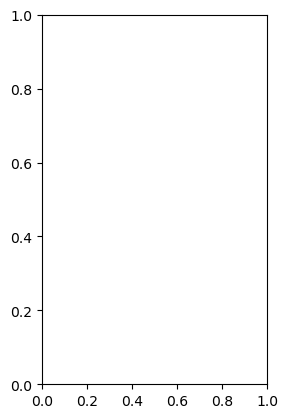

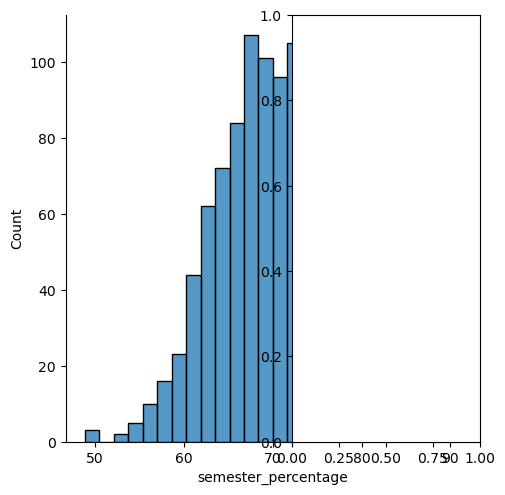

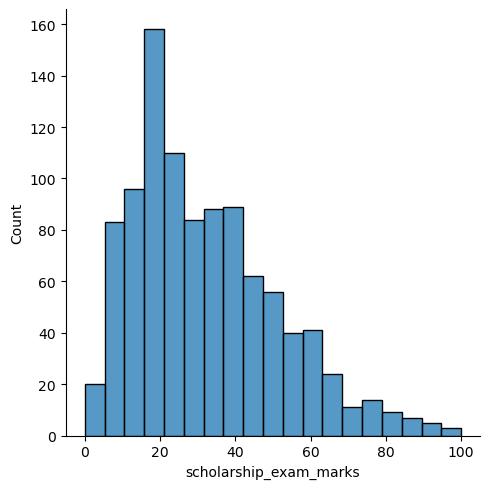

In [64]:
plt.subplot(1,2,1)
sns.displot(df['semester_percentage'])
plt.subplot(1,2,2)
sns.displot(df['scholarship_exam_marks'])
plt.show()

In [65]:
mean = df['semester_percentage'].mean()
std = df['semester_percentage'].std()


In [66]:
print(mean, std)

69.6124 6.158978751323897


In [67]:
# outliers are beyond this 
highest_allowed = mean + 3*std
lowest_allowed = mean - 3*std


In [68]:
print(highest_allowed, lowest_allowed)

88.08933625397168 51.13546374602831


In [73]:
df[(df['semester_percentage'] < lowest_allowed) | (df['semester_percentage'] > highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


#### Trimming

In [ ]:
# without outlier

df[(df['semester_percentage'] > lowest_allowed) & (df['semester_percentage'] < highest_allowed)]


,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


#### Z-Score

In [78]:
df["z_score"] =( df['semester_percentage'] - df['semester_percentage'].mean()) / df['semester_percentage'].std() 

In [79]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [ ]:
# outliers

df[(df["z_score"]<-3) | (df["z_score"]>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [82]:
# without outliers
df[(df["z_score"]>-3) & (df["z_score"]<3)]


,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


#### Capping

In [84]:
upper_limit = mean + 3*std
lower_limit = mean - 3*std

In [89]:
# in the capping we change the values 

df['semester_percentage'] = np.where(df['semester_percentage'] > upper_limit , upper_limit,np.where(df['semester_percentage'] < lower_limit , lower_limit, df['semester_percentage'] ))

In [90]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


In [91]:
# we have no outlier 

df[(df['semester_percentage'] < lower_limit) & (df['semester_percentage'] > upper_limit)]


,semester_percentage,scholarship_exam_marks,got_scholarship,z_score


# Outlier removal using IQR

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [93]:
data = pd.read_csv("scholarship.csv")

In [94]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


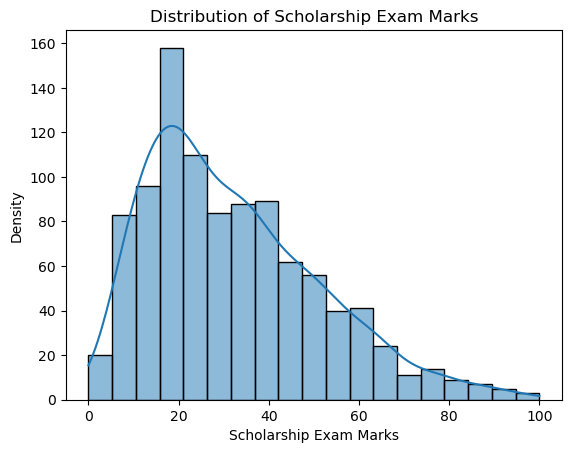

In [96]:
sns.histplot(data["scholarship_exam_marks"], kde=True)
plt.xlabel('Scholarship Exam Marks')
plt.ylabel('Density')
plt.title('Distribution of Scholarship Exam Marks')
plt.show()

<Axes: >

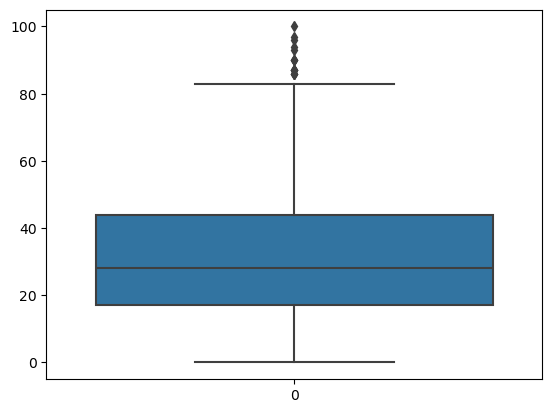

In [97]:
sns.boxplot(data["scholarship_exam_marks"])


In [98]:
Q1 = data['scholarship_exam_marks'].quantile(0.25)
Q3 = data['scholarship_exam_marks'].quantile(0.75)



In [99]:
print(Q1,Q3)

17.0 44.0


In [100]:
IQR = Q3 - Q1

In [101]:
print(IQR)

27.0


In [105]:
data.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [103]:
minvalue = Q1 - 1.5*IQR

maxvalue = Q3 + 1.5*IQR

In [104]:
print(minvalue,maxvalue)

-23.5 84.5


In [107]:
#trimming
new_data = data[(data["scholarship_exam_marks"]>minvalue) & (data["scholarship_exam_marks"]<maxvalue)]

In [108]:
new_data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


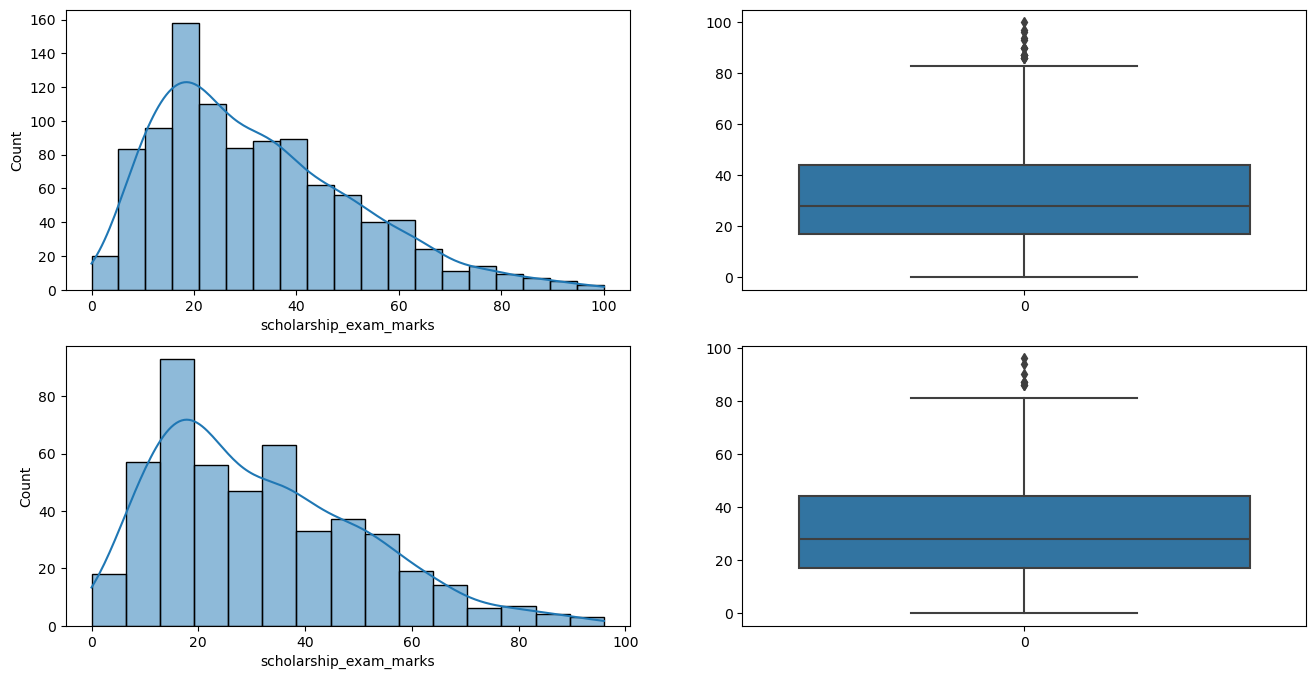

In [110]:
df_new = df[df['got_scholarship'] == 1]

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.histplot(df["scholarship_exam_marks"], kde=True)

plt.subplot(2, 2, 2)
sns.boxplot(df["scholarship_exam_marks"])

plt.subplot(2, 2, 3)
sns.histplot(df_new["scholarship_exam_marks"], kde=True)

plt.subplot(2, 2, 4)
sns.boxplot(df_new["scholarship_exam_marks"])

plt.show()


In [112]:
#capping
new_data2 = data.copy()
new_data2["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]>maxvalue,
         maxvalue, 
         np.where(data["scholarship_exam_marks"]<minvalue,minvalue, data["scholarship_exam_marks"]))

In [115]:
new_data2

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26.0,1
1,74.6,38.0,1
2,75.4,40.0,1
3,64.2,8.0,1
4,72.3,17.0,0
...,...,...,...
995,88.7,44.0,1
996,91.2,65.0,1
997,48.9,34.0,0
998,86.2,46.0,1


In [114]:
new_data2["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: scholarship_exam_marks, dtype: float64

<Axes: >

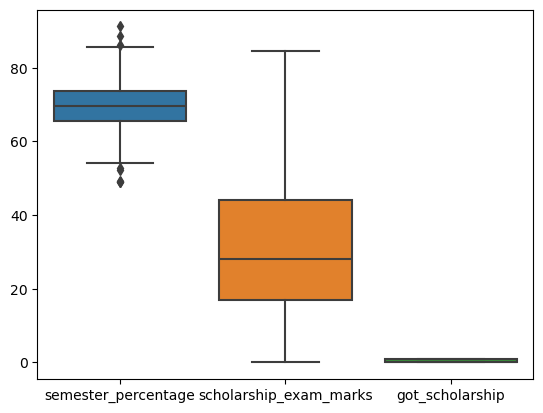

In [116]:
sns.boxplot(new_data2)

# Outlier Removal using Percentile

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np

In [118]:
df = pd.read_csv("weight-height.csv")

In [119]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [120]:
df.shape

(10000, 3)

c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


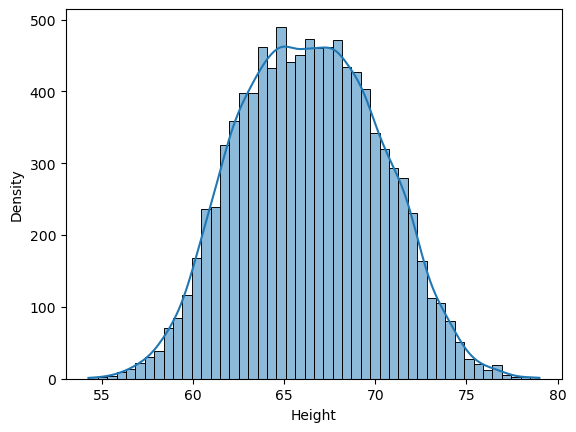

In [121]:
sns.histplot(df["Height"], kde=True)
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()

<Axes: >

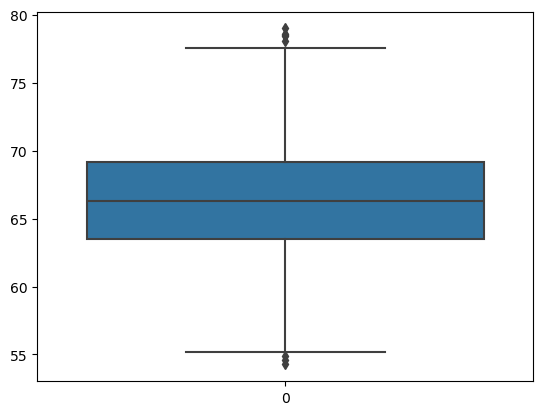

In [122]:
sns.boxplot(df["Height"])

In [123]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [124]:
max_limit = df["Height"].quantile(0.99)
min_limit = df["Height"].quantile(0.01)

In [125]:
# Trimming
new_data = df[(df["Height"]>min_limit) & (df["Height"]<max_limit)]

In [126]:
new_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


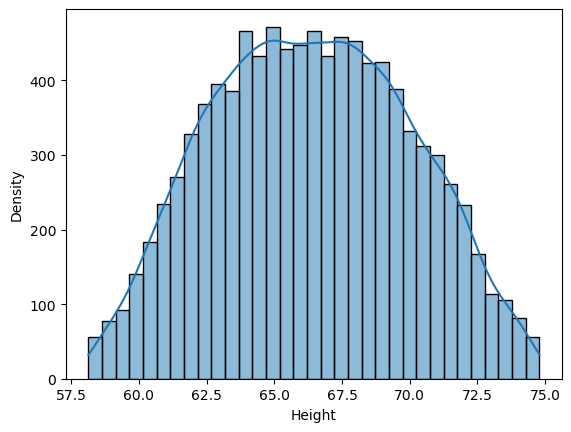

In [132]:
sns.histplot(new_data["Height"], kde=True)
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()

<Axes: >

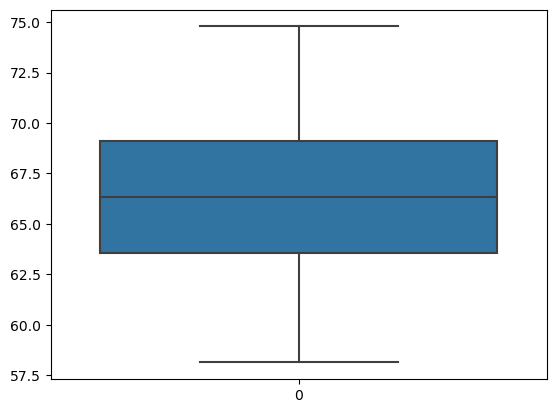

In [128]:
sns.boxplot(new_data['Height'])

In [129]:
#capping
new_data2 = df.copy()
new_data2["Height"] = np.where(df["Height"]>max_limit,max_limit, np.where(df["Height"]<min_limit,min_limit, df["Height"]))

In [130]:
new_data2


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


c:\Users\gupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


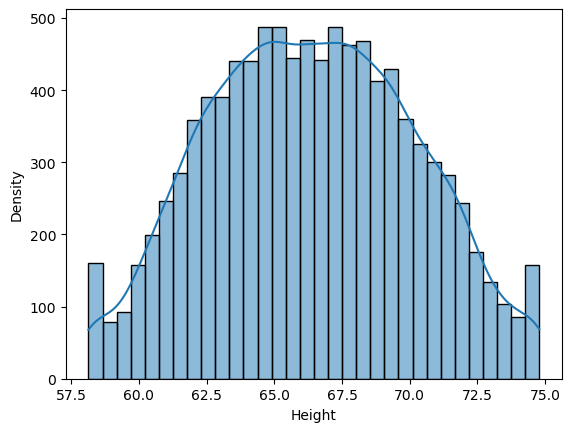

In [133]:
sns.histplot(new_data2["Height"], kde=True)
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()

<Axes: >

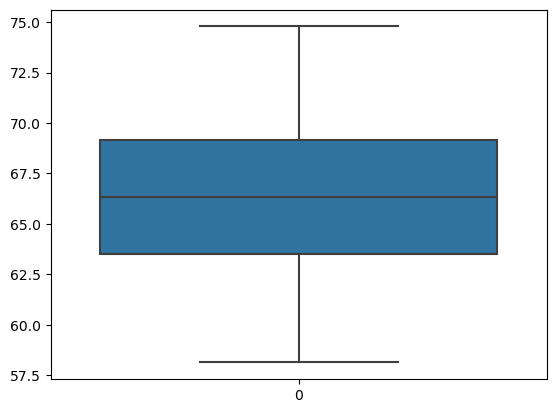

In [131]:
sns.boxplot(new_data2['Height'])


# Correction of Datatype

In [134]:
df = pd.read_csv("AB_NYC_2019.csv")

In [135]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48906 non-null  int64  
 1   name                            48890 non-null  object 
 2   host_id                         48906 non-null  int64  
 3   host_name                       48885 non-null  object 
 4   neighbourhood_group             48906 non-null  object 
 5   neighbourhood                   48906 non-null  object 
 6   latitude                        48906 non-null  float64
 7   longitude                       48906 non-null  float64
 8   room_type                       48906 non-null  object 
 9   price                           48906 non-null  int64  
 10  minimum_nights                  48906 non-null  int64  
 11  number_of_reviews               48906 non-null  int64  
 12  last_review                     

In [137]:
df["id"] = df["id"].astype(str)

In [138]:
df["id"].dtype

dtype('O')

In [139]:
df["host_id"] = df["host_id"].astype(str)

In [140]:
df["last_review"] = pd.to_datetime(df["last_review"])

C:\Users\gupta\AppData\Local\Temp\ipykernel_19484\3465608367.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["last_review"] = pd.to_datetime(df["last_review"])


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48906 entries, 0 to 48905
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48906 non-null  object        
 1   name                            48890 non-null  object        
 2   host_id                         48906 non-null  object        
 3   host_name                       48885 non-null  object        
 4   neighbourhood_group             48906 non-null  object        
 5   neighbourhood                   48906 non-null  object        
 6   latitude                        48906 non-null  float64       
 7   longitude                       48906 non-null  float64       
 8   room_type                       48906 non-null  object        
 9   price                           48906 non-null  int64         
 10  minimum_nights                  48906 non-null  int64         
 11  nu